### Import libraries

In [24]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statistics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

### Pick and load one image from a directory

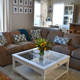

In [25]:
im=Image.open(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test\0.png",'r')
im

im= im.resize((80,80))
im

### Transform the list of pixels in a single image
example:

[210,111,212] ---> [233] [111] [212]


In [26]:

pix_val = list(im.getdata())
r_list=[]
g_list=[]
b_list=[]
for x in pix_val:
    for z in x:
        if z==x[0]:
            r_list.append(z)
        elif z==x[1]:
            g_list.append(z)
        elif z==x[2]:
            b_list.append(z)
            
#I've used a function of Image module called getdata() to extract the pixel values.
#This scans the image horizontally from left to right starting at the top-left corner. 
#The values got from each pixel is then added into a list. 
#Finally what we get is a list with each pixel value as a set of 4 values(R,G,B.A).

#pix_val

### Pick and load all the images from the directory and transform the list of pixels

In [27]:
size_x=120 # size
size_y=120 # size


reshaped_images_clean_train= [] #np.zeros((size_x,size_y,3))
reshaped_images_messy_train= []
reshaped_images_clean_val= []
reshaped_images_messy_val= []
reshaped_images_test= []
lists_xs_tot=[]
def load_images_from_folder(folder):
    images = []
    global size_x,size_y 
    for item in list_images:
        img_iterative = os.path.join(folder,item)
        for filename in os.listdir(img_iterative):    
            img = os.path.join(img_iterative,filename)
            if img is not None:      
                im=Image.open(img,'r')
                im=im.resize((size_x,size_y)) #size
                pix_val=list(im.getdata())
                #print(np.array(pix_val).reshape((size_x,size_y,3)))
                #print(np.array(pix_val).reshape((size_x,size_y,3)).shape)
                r_list=[]
                g_list=[]
                b_list=[]  
                lists_xs=[]
                for x in pix_val:
                    #list_x=list(x)
                    #lists_xs.append(list_x)
                    for z in x:
                        if z==x[0]:
                            r_list.append(z)
                        elif z==x[1]:
                            g_list.append(z)
                        elif z==x[2]:
                            b_list.append(z) 
                #np.array(lists_xs).reshape((size_x,size_y,3))            
                #lists_xs_tot.append(lists_xs)
                rgb_list=r_list+g_list+b_list 
                reshaped_image=np.array(rgb_list).reshape((size_x,size_y,3)).tolist()
                rgb_list.insert(0,item)
                #print(lists_xs)
                images.append(rgb_list) 
                #used for CNNs
                if item=='clean_train':
                    reshaped_images_clean_train.append(reshaped_image)
                elif item=='messy_train': 
                    reshaped_images_messy_train.append(reshaped_image)
                elif item=='clean_val':
                    reshaped_images_clean_val.append(reshaped_image)
                elif  item=='messy_val':
                    reshaped_images_messy_val.append(reshaped_image)
                elif item =='test':
                    reshaped_images_test.append(reshaped_image)
                               
                
    return images
folder="C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy"

list_images=['clean_train','clean_val','messy_train','messy_val','test']
result=load_images_from_folder(folder)

#print(x_val)

### Train the model with a CNN

In [23]:
tf.random.set_seed(79)

train_reshaped=reshaped_images_clean_train+ reshaped_images_messy_train
train_reshaped=np.array(train_reshaped)/255 #.div(255)

#model = tf.keras.applications.DenseNet169(include_top=True,weights=None,input_shape=(35,35,3),classes=1)
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='linear', input_shape=(120,120, 3)),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3)),#activation='linear'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    #tf.keras.layers.Conv2D(16, (3,3), activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    #tf.keras.layers.Dropout(rate=0.05),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),  activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='linear'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1722, activation='elu',kernel_initializer='glorot_normal'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.Dense(48, activation='elu',kernel_initializer='glorot_normal'),
    #tf.keras.layers.Dropout(rate=0.05),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
      ])


'''import os
root_logdir=os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    import time
    run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)
run_logdir=get_run_logdir()
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)'''
val_reshaped=reshaped_images_clean_val+ reshaped_images_messy_val
opt = keras.optimizers.Adam(learning_rate=0.000009)
val_reshaped=np.array(val_reshaped)/255 #.div(255)
a=np.array([0 for x in range(0, len(reshaped_images_clean_train))]+[1 for x in range(0, len(reshaped_images_messy_train))])
b=np.array([0 for x in range(0, len(reshaped_images_clean_val))]+[1 for x in range(0, len(reshaped_images_messy_val))])
c=train_reshaped.reshape(train_reshaped.shape)
d=val_reshaped.reshape(val_reshaped.shape)

    #checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=108,restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history=model.fit(c,a.reshape(a.shape),epochs=7000,validation_data=(d,b.reshape(b.shape)),
callbacks=[early_stopping_cb],batch_size=10)
#model.summary()
#pd.set_option('display.max_rows', 10)

Epoch 1/7000
20/20 [==============================] - 1s 20ms/step - loss: 0.6985 - accuracy: 0.5208 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 2/7000
20/20 [==============================] - 0s 7ms/step - loss: 0.6590 - accuracy: 0.6615 - val_loss: 0.6363 - val_accuracy: 0.7500
Epoch 3/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.6289 - accuracy: 0.7292 - val_loss: 0.6115 - val_accuracy: 0.7000
Epoch 4/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.6050 - accuracy: 0.7708 - val_loss: 0.5933 - val_accuracy: 0.6500
Epoch 5/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.5940 - accuracy: 0.7448 - val_loss: 0.5776 - val_accuracy: 0.8000
Epoch 6/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.5695 - accuracy: 0.7865 - val_loss: 0.5643 - val_accuracy: 0.6500
Epoch 7/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.5541 - accuracy: 0.7865 - val_loss: 0.5474 - val_accuracy: 0.7000
Epoch

20/20 [==============================] - 0s 6ms/step - loss: 0.4026 - accuracy: 0.8594 - val_loss: 0.4723 - val_accuracy: 0.8000
Epoch 59/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.4059 - accuracy: 0.8594 - val_loss: 0.4706 - val_accuracy: 0.7000
Epoch 60/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.3946 - accuracy: 0.8542 - val_loss: 0.4691 - val_accuracy: 0.7500
Epoch 61/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.3900 - accuracy: 0.8542 - val_loss: 0.4698 - val_accuracy: 0.7000
Epoch 62/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.3923 - accuracy: 0.8594 - val_loss: 0.4691 - val_accuracy: 0.7500
Epoch 63/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.8542 - val_loss: 0.4681 - val_accuracy: 0.8000
Epoch 64/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.3884 - accuracy: 0.8750 - val_loss: 0.4674 - val_accuracy: 0.8000
Epoch 65/7000

20/20 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.8906 - val_loss: 0.4293 - val_accuracy: 0.7500
Epoch 116/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.2954 - accuracy: 0.9115 - val_loss: 0.4283 - val_accuracy: 0.8000
Epoch 117/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.9010 - val_loss: 0.4372 - val_accuracy: 0.8500
Epoch 118/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.2861 - accuracy: 0.9167 - val_loss: 0.4362 - val_accuracy: 0.8500
Epoch 119/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.2973 - accuracy: 0.8854 - val_loss: 0.4257 - val_accuracy: 0.7500
Epoch 120/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.2833 - accuracy: 0.9167 - val_loss: 0.4272 - val_accuracy: 0.8500
Epoch 121/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.2846 - accuracy: 0.9062 - val_loss: 0.4266 - val_accuracy: 0.8500
Epoch 1

Epoch 172/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.1660 - accuracy: 0.9688 - val_loss: 0.4224 - val_accuracy: 0.8000
Epoch 173/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.1798 - accuracy: 0.9531 - val_loss: 0.4364 - val_accuracy: 0.8500
Epoch 174/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.1696 - accuracy: 0.9740 - val_loss: 0.4575 - val_accuracy: 0.8500
Epoch 175/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.1731 - accuracy: 0.9583 - val_loss: 0.4861 - val_accuracy: 0.8500
Epoch 176/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.1711 - accuracy: 0.9583 - val_loss: 0.4372 - val_accuracy: 0.8000
Epoch 177/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.1605 - accuracy: 0.9688 - val_loss: 0.4311 - val_accuracy: 0.8000
Epoch 178/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.9688 - val_loss: 0.4277 - val_accuracy:

Epoch 229/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.0734 - accuracy: 1.0000 - val_loss: 0.4608 - val_accuracy: 0.8500
Epoch 230/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.0763 - accuracy: 1.0000 - val_loss: 0.4843 - val_accuracy: 0.8500
Epoch 231/7000
20/20 [==============================] - 0s 5ms/step - loss: 0.0722 - accuracy: 1.0000 - val_loss: 0.4917 - val_accuracy: 0.8500
Epoch 232/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.0756 - accuracy: 1.0000 - val_loss: 0.4890 - val_accuracy: 0.8500
Epoch 233/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.0698 - accuracy: 1.0000 - val_loss: 0.4852 - val_accuracy: 0.8500
Epoch 234/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.0675 - accuracy: 1.0000 - val_loss: 0.4604 - val_accuracy: 0.8500
Epoch 235/7000
20/20 [==============================] - 0s 6ms/step - loss: 0.0679 - accuracy: 1.0000 - val_loss: 0.4759 - val_accuracy:

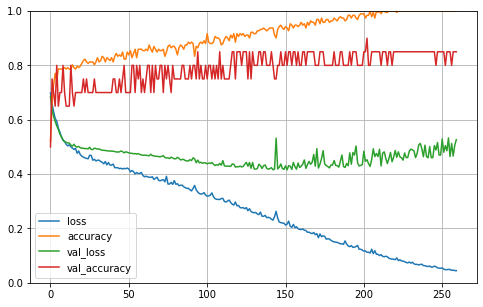

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_xlim(0,29)
plt.gca().set_ylim(0,1)
model.save('my_keras_model_noaug2.h5')

In [20]:
pred=model.predict_classes(reshaped_images_test)
predicted_class_indices=np.array(pred).reshape(len(pred))
#labels = (reshaped_images_test.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#predictions = [labels[k] for k in predicted_class_indices]
filenames=os.listdir(r'C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test')
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predicted_class_indices})
results

C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Filename,Predictions
0,0.png,1
1,1.png,0
2,2.png,1
3,3.png,1
4,4.png,1
5,5.png,1
6,6.png,0
7,7.png,1
8,8.png,1
9,9.png,0


#### Number 1 means that the room is classified as messy, otherwise 0 indicates that the room is clean.


### Details about the CNN

In [21]:
model=keras.models.load_model('my_keras_model_noaug2.h5') 

model.summary()

for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(model.layers[i].get_config())
#info about optimizers
model.optimizer.get_config()       


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 118, 118, 16)      448       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 59, 59, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 57, 57, 32)        4640      
_________________________________________________________________
activation_11 (Activation)   (None, 57, 57, 32)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 13, 13, 32)      

{'name': 'Adam',
 'learning_rate': 9e-06,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [22]:
plt.savefig('results/my_keras_model_noaug2.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>